# 대학생 정신 건강 데이터 분석
 - 학생들의 정신 겅강에 영향을 미치는 요인이 무엇인지?

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, pendulum

In [2]:
file_path = './Data/'
file_list = os.listdir(file_path)
print(file_list)

df_rawdata_health = pd.read_csv(file_path+file_list[0])

['Student Mental health.csv']


In [3]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df_rawdata_health)
# profile.to_widgets()

In [4]:
df_rawdata_health.info()
df_rawdata_health

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [5]:
df_mod00_health = df_rawdata_health.copy()
df_mod00_health.columns = ['Datatime', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_status',
                           'Depression', 'Anxiety', 'Panic_attack', 'Treatment']

In [6]:
df_mod00_health.describe(include='all')

,Datatime,Gender,Age,Course,Year,CGPA,Marital_status,Depression,Anxiety,Panic_attack,Treatment
count,101,101,100.00000,101,101,101,101,101,101,101,101
unique,92,2,NaN,49,7,6,2,2,2,2,2
top,8/7/2020 12:39,Female,NaN,BCS,year 1,3.50 - 4.00,No,No,No,No,No
freq,3,75,NaN,18,41,47,85,66,67,68,95
mean,NaN,NaN,20.53000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.49628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,19.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_mod00_health.Year.unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [8]:
df_mod00_health.Year = df_mod00_health.Year.str.lstrip('Yyear ').astype(int)

In [9]:
df_mod00_health.Year.unique()

array([1, 2, 3, 4])

In [10]:
df_mod00_health.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [11]:
df_mod00_health.CGPA = df_mod00_health.CGPA.str.rstrip(' ')

In [12]:
df_mod00_health.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [13]:
df_mod00_health.Course.unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [14]:
df_mod00_health.Course = df_mod00_health.Course.replace({'engin':'Engineering', 'Engine':'Engineering',
                                                         'Islamic education':'Islamic Education',
                                                         'BIT':'IT',
                                                         'Laws':'Law',
                                                         'Pendidikan islam':'Pendidikan Islam', 'Pendidikan Islam ':'Pendidikan Islam',
                                                         'KOE':'Koe', 'koe':'Koe',
                                                         'Kirkhs':'Irkhs', 'KIRKHS':'Irkhs',
                                                         'Benl':'BENL',
                                                         'Fiqh fatwa ':'Fiqh',
                                                         'psychology':'Psychology',
                                                         'Nursing ':'Nursing'
                                                         })

In [15]:
len(df_mod00_health.Course.unique())

35

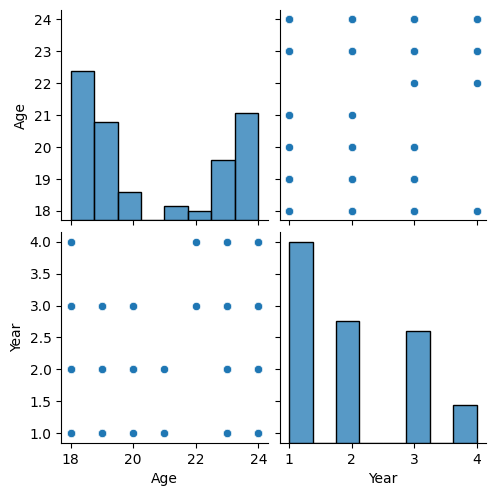

In [18]:
sns.pairplot(df_mod00_health)
plt.show()

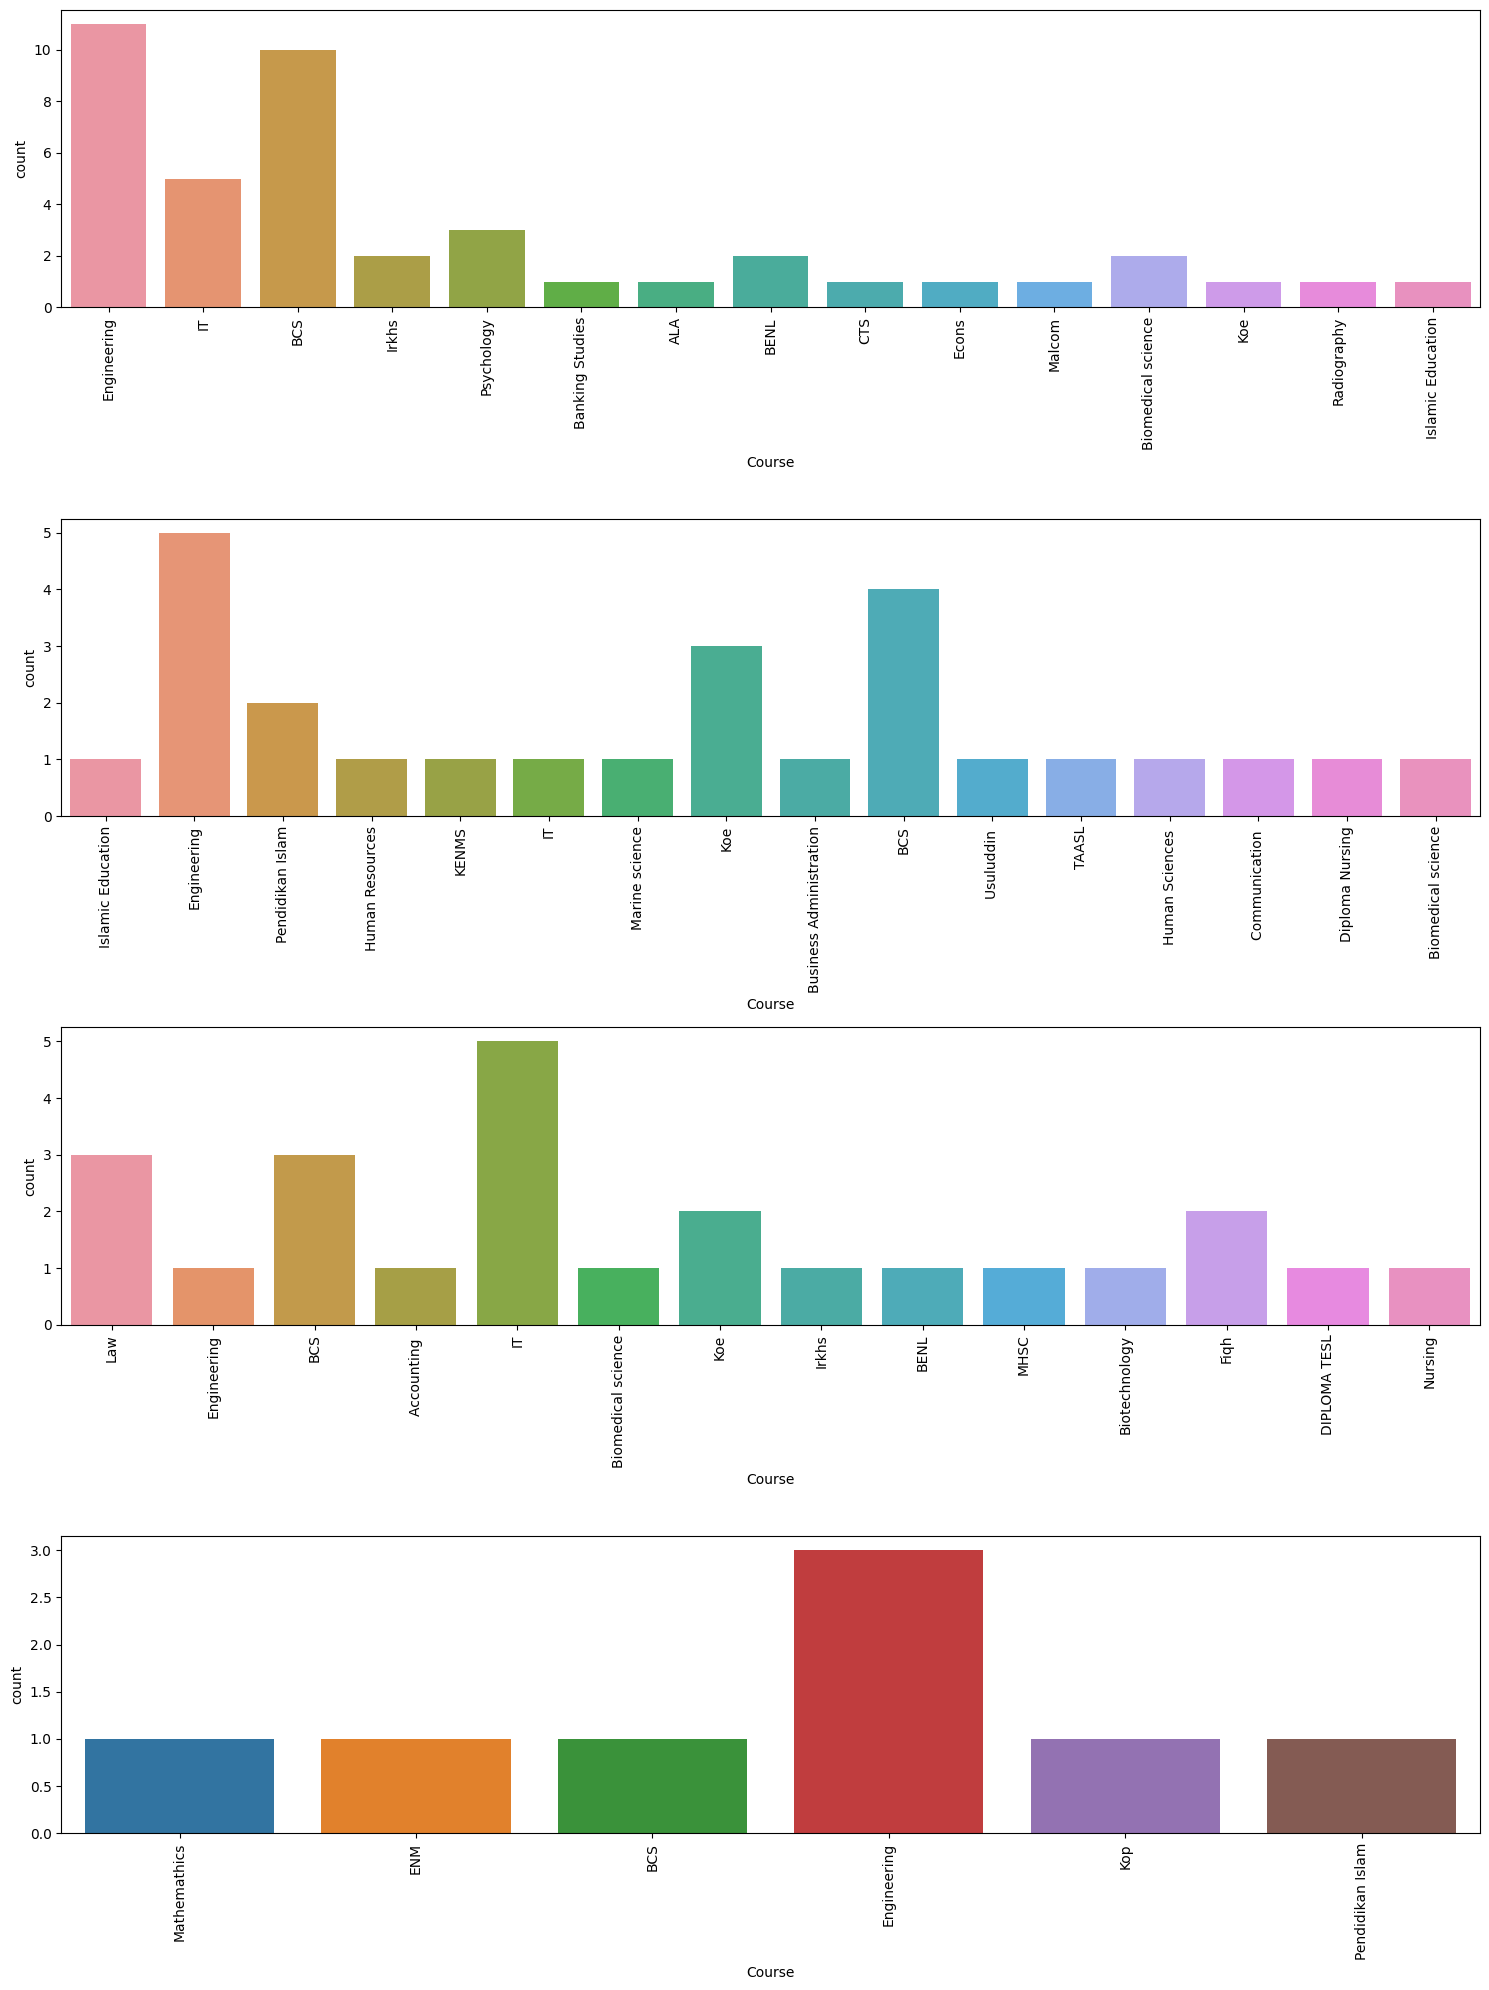

In [95]:
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(15,20)

sns.countplot(data=df_mod00_health[df_mod00_health.Year == 1], x='Course', ax=axs[0])
axs[0].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Year == 2], x='Course', ax=axs[1])
axs[1].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Year == 3], x='Course', ax=axs[2])
axs[2].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Year == 4], x='Course', ax=axs[3])
axs[3].xaxis.set_tick_params(rotation=90)

fig.tight_layout()
plt.show()

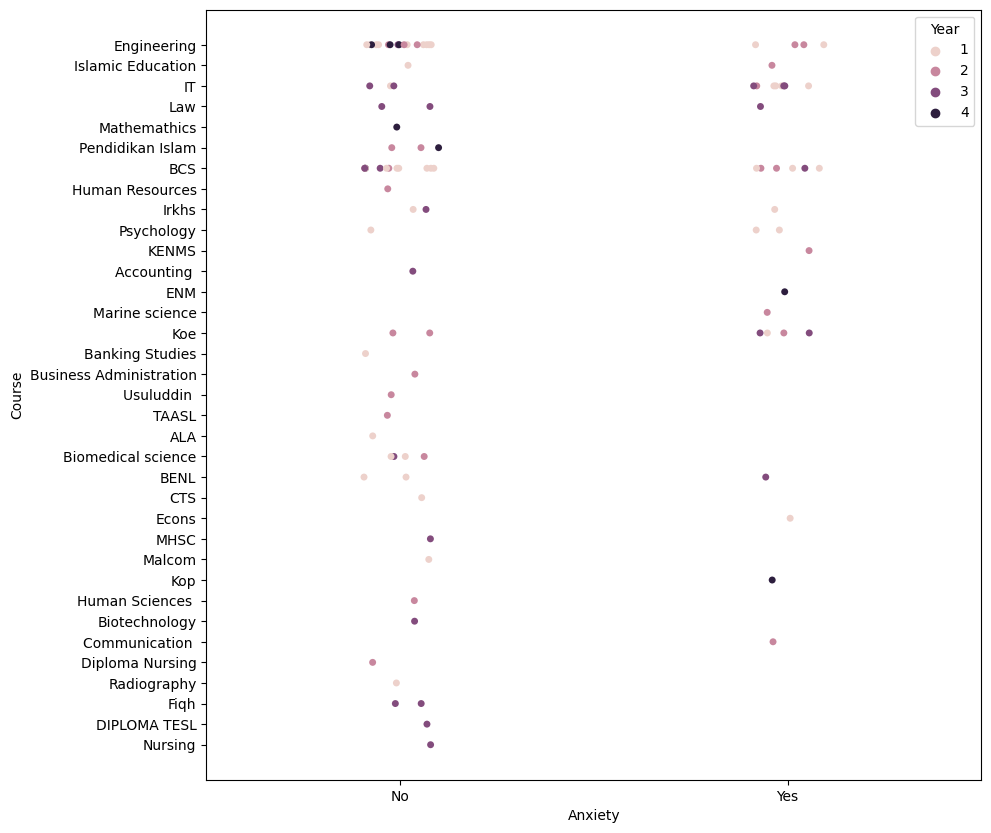

In [99]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.stripplot(data=df_mod00_health, x='Anxiety', y='Course', hue='Year')

plt.show()

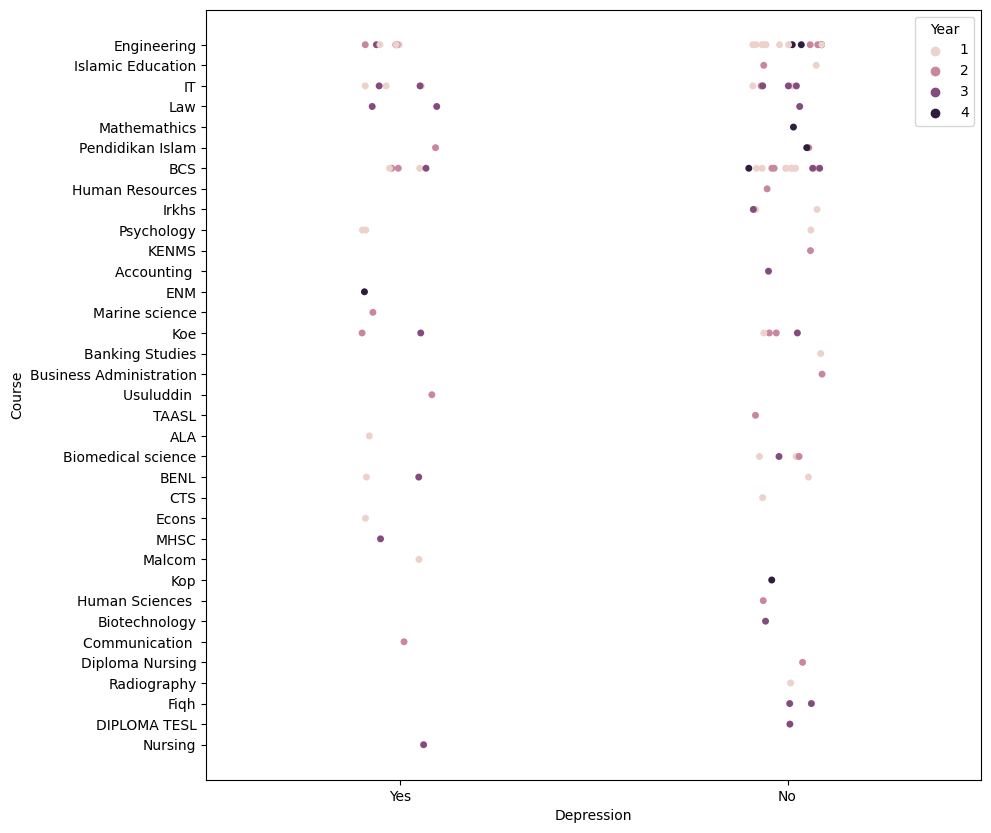

In [101]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.stripplot(data=df_mod00_health, x='Depression', y='Course', hue='Year')

plt.show()

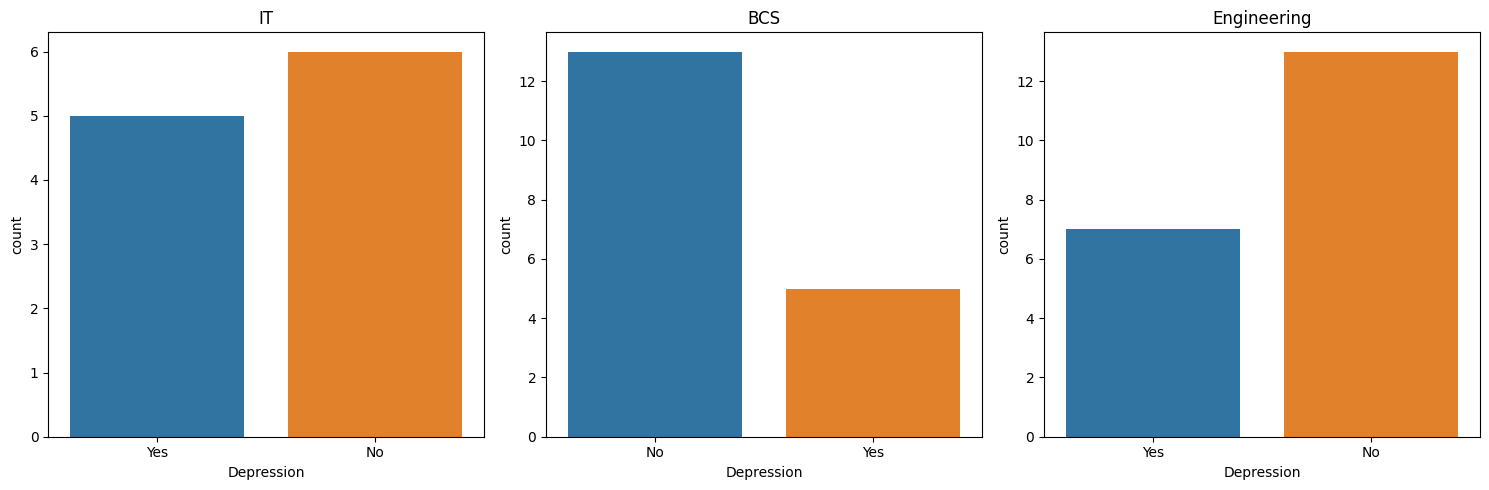

In [22]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,5)

sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'IT'], x='Depression', ax=axs[0])
axs[0].set_title('IT')
# axs[0].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'BCS'], x='Depression', ax=axs[1])
axs[1].set_title('BCS')
# axs[1].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'Engineering'], x='Depression', ax=axs[2])
axs[2].set_title('Engineering')
# axs[2].xaxis.set_tick_params(rotation=90)

fig.tight_layout()
plt.show()

In [32]:
df_mod01_health = df_mod00_health[df_mod00_health.Course.isin(['IT', 'BCS', 'Engineering'])]
df_mod01_health.groupby(['Course', 'Depression'])['Age'].agg(['count'])
df_mod01_health.groupby(['Course', 'Panic_attack'])['Age'].agg(['count'])

count
Course      Panic_attack       
BCS         No               13
            Yes               5
Engineering No               14
            Yes               6
IT          No                5
            Yes               5

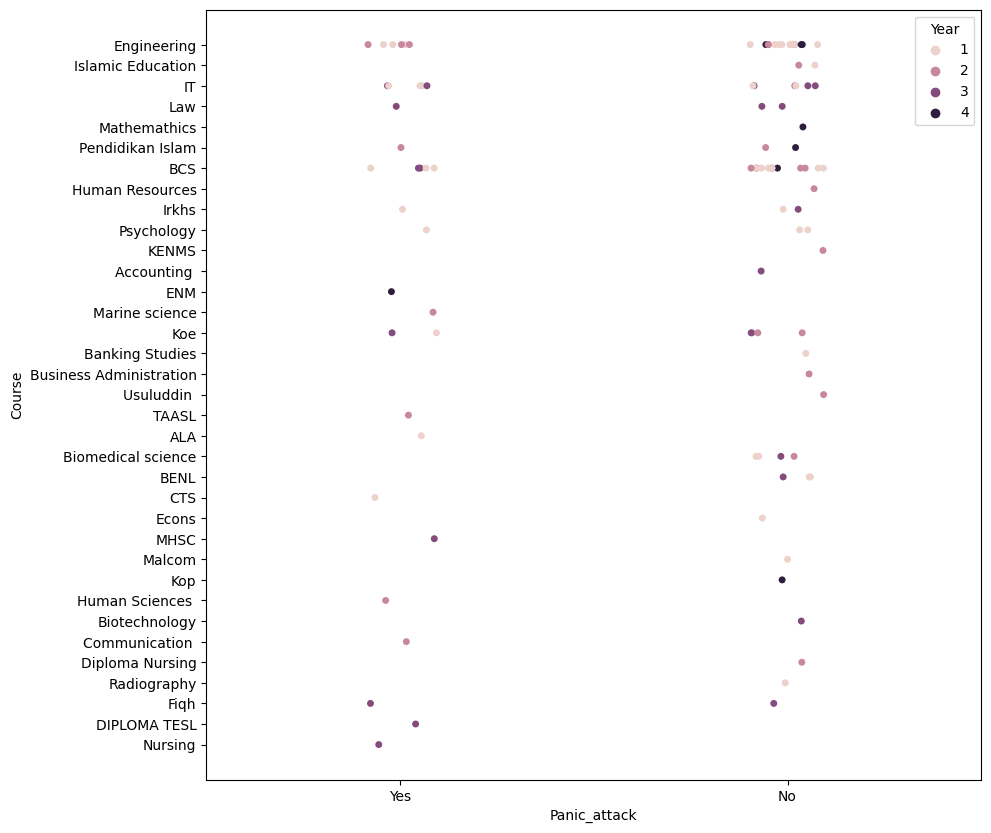

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)

sns.stripplot(data=df_mod00_health, x='Panic_attack', y='Course', hue='Year')

plt.show()

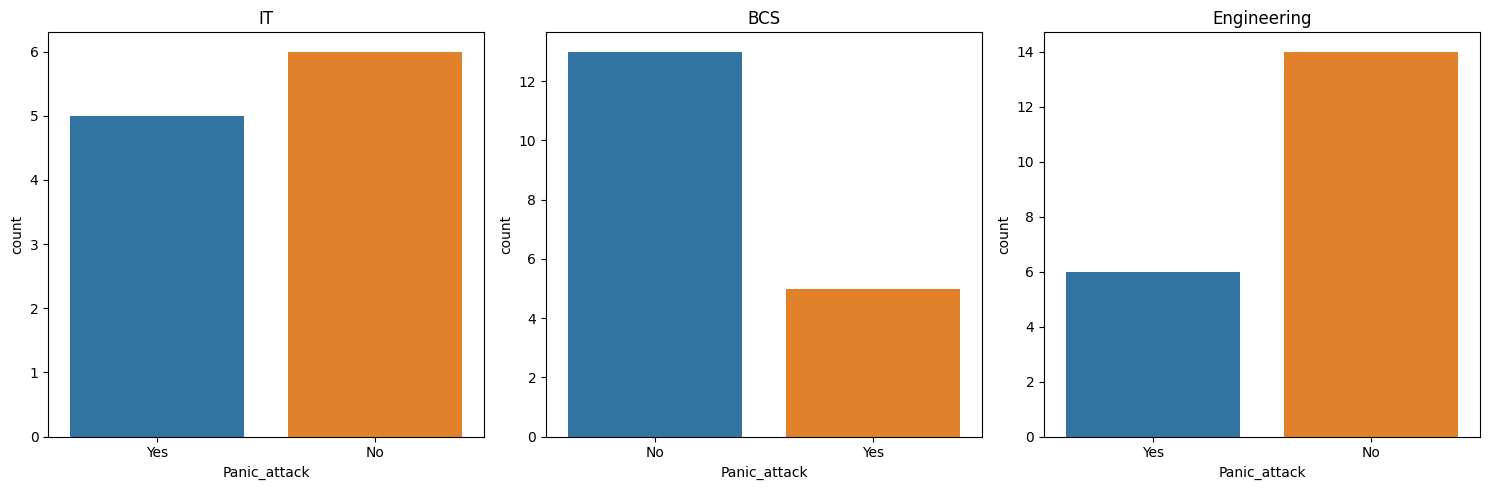

In [31]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,5)

sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'IT'], x='Panic_attack', ax=axs[0])
axs[0].set_title('IT')
# axs[0].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'BCS'], x='Panic_attack', ax=axs[1])
axs[1].set_title('BCS')
# axs[1].xaxis.set_tick_params(rotation=90)
sns.countplot(data=df_mod00_health[df_mod00_health.Course == 'Engineering'], x='Panic_attack', ax=axs[2])
axs[2].set_title('Engineering')
# axs[2].xaxis.set_tick_params(rotation=90)

fig.tight_layout()
plt.show()

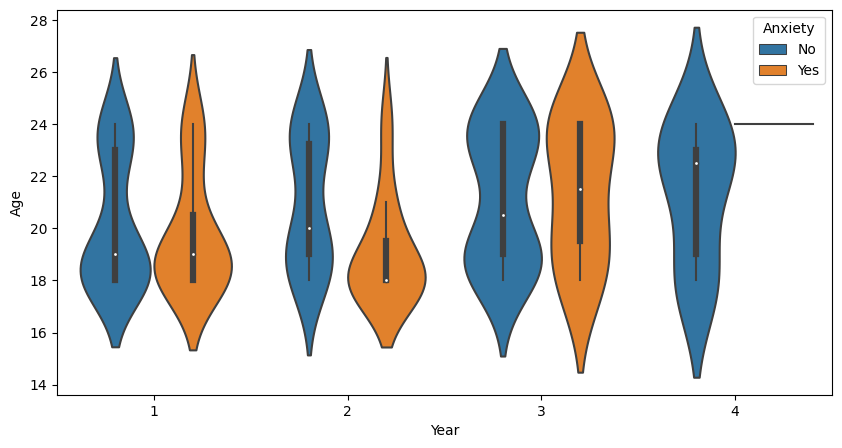

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.violinplot(data=df_mod00_health, x='Year', y='Age', hue='Anxiety')

plt.show()

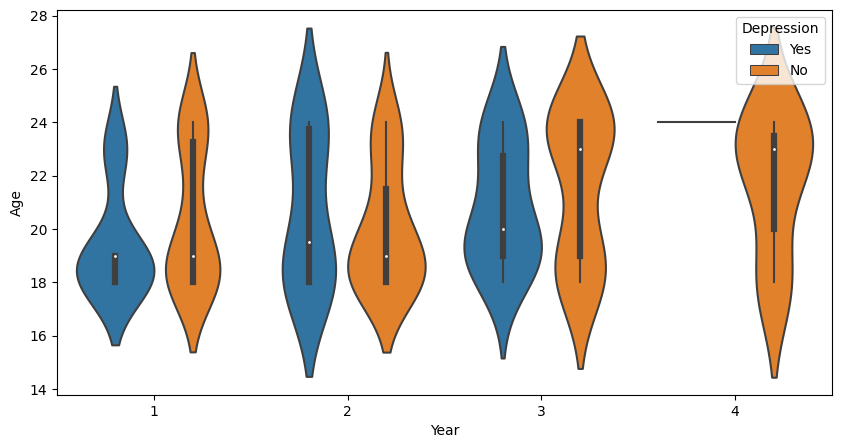

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.violinplot(data=df_mod00_health, x='Year', y='Age', hue='Depression')

plt.show()

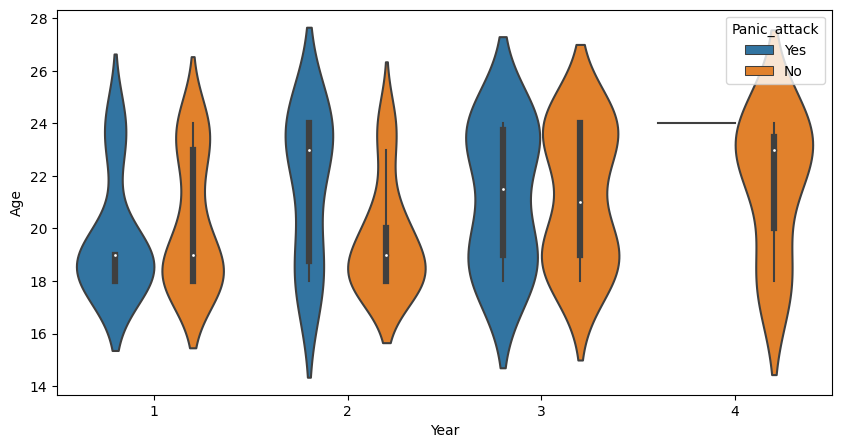

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

sns.violinplot(data=df_mod00_health, x='Year', y='Age', hue='Panic_attack')

plt.show()

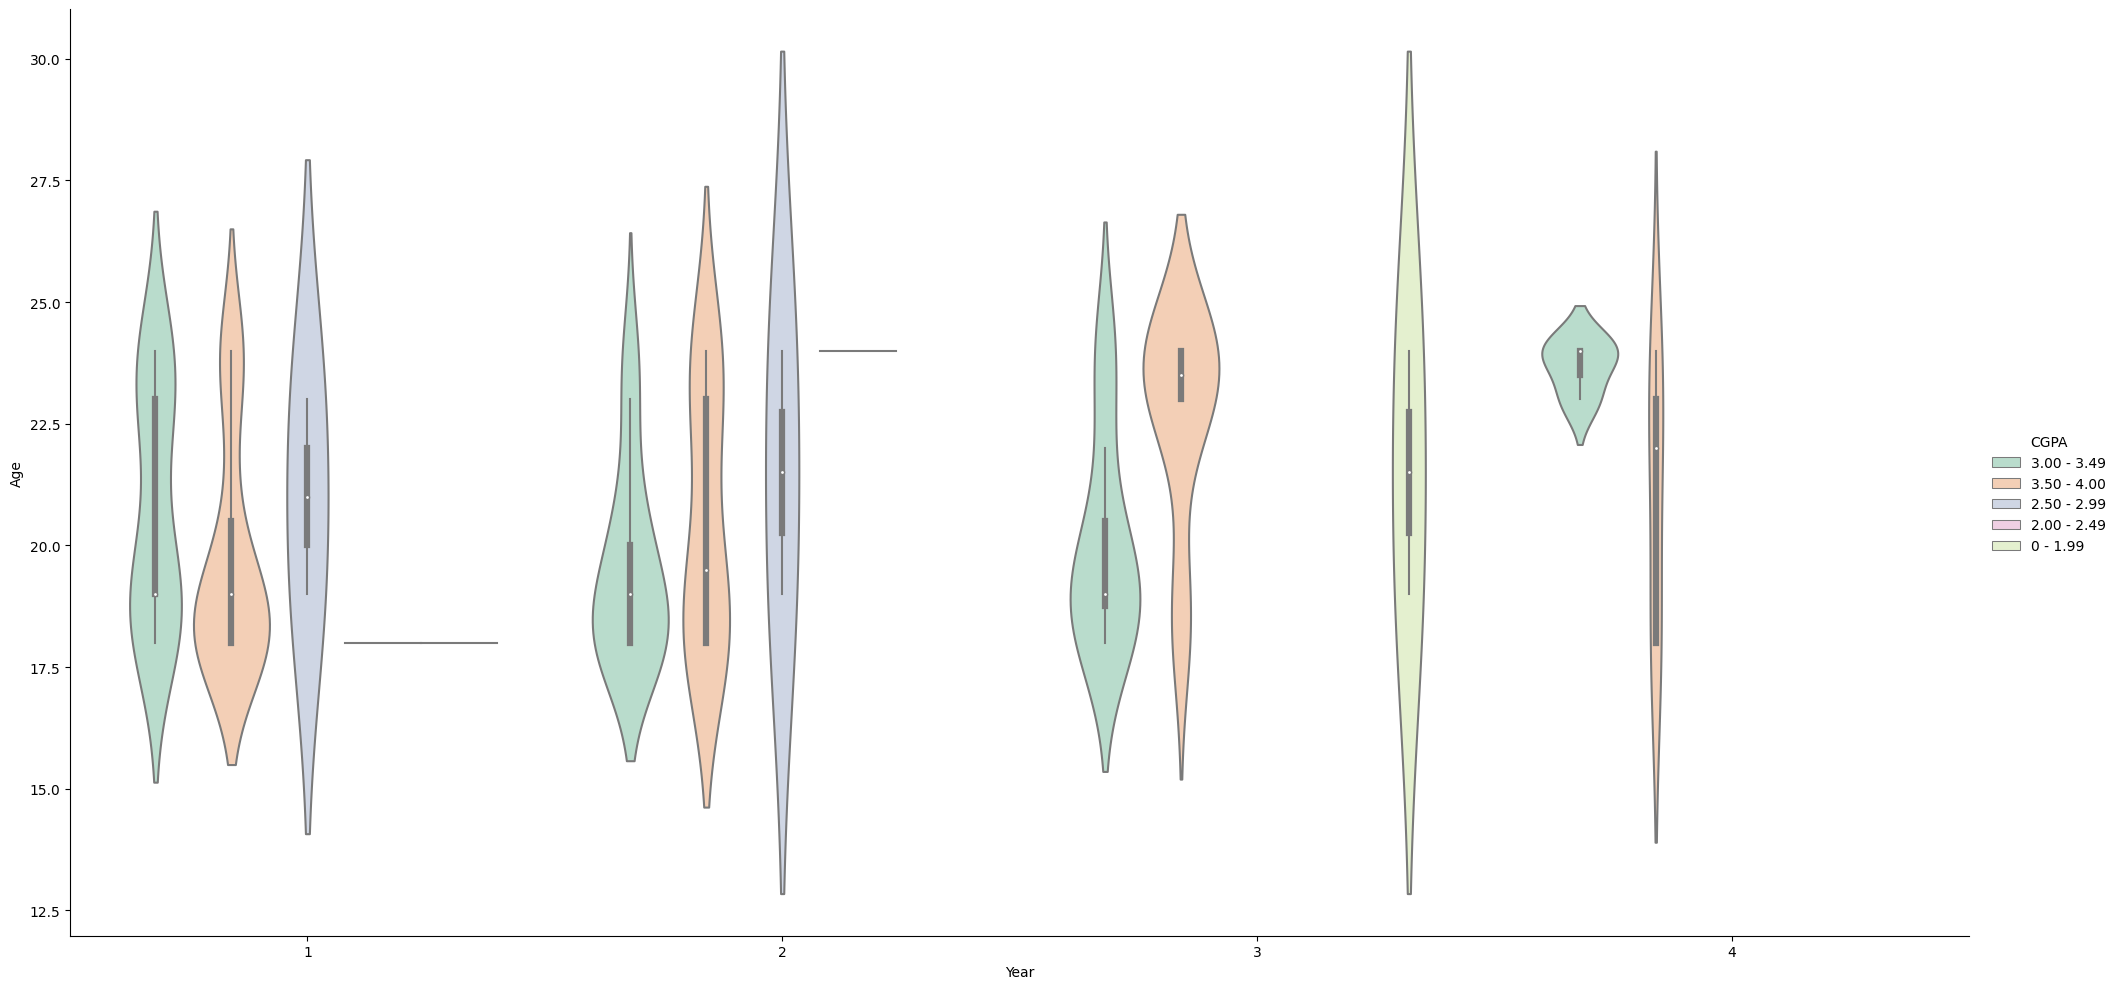

In [38]:
sns.catplot(data=df_mod00_health, x='Year', y='Age', hue='CGPA', kind='violin', palette='Pastel2', height=10, aspect=2)

plt.show()

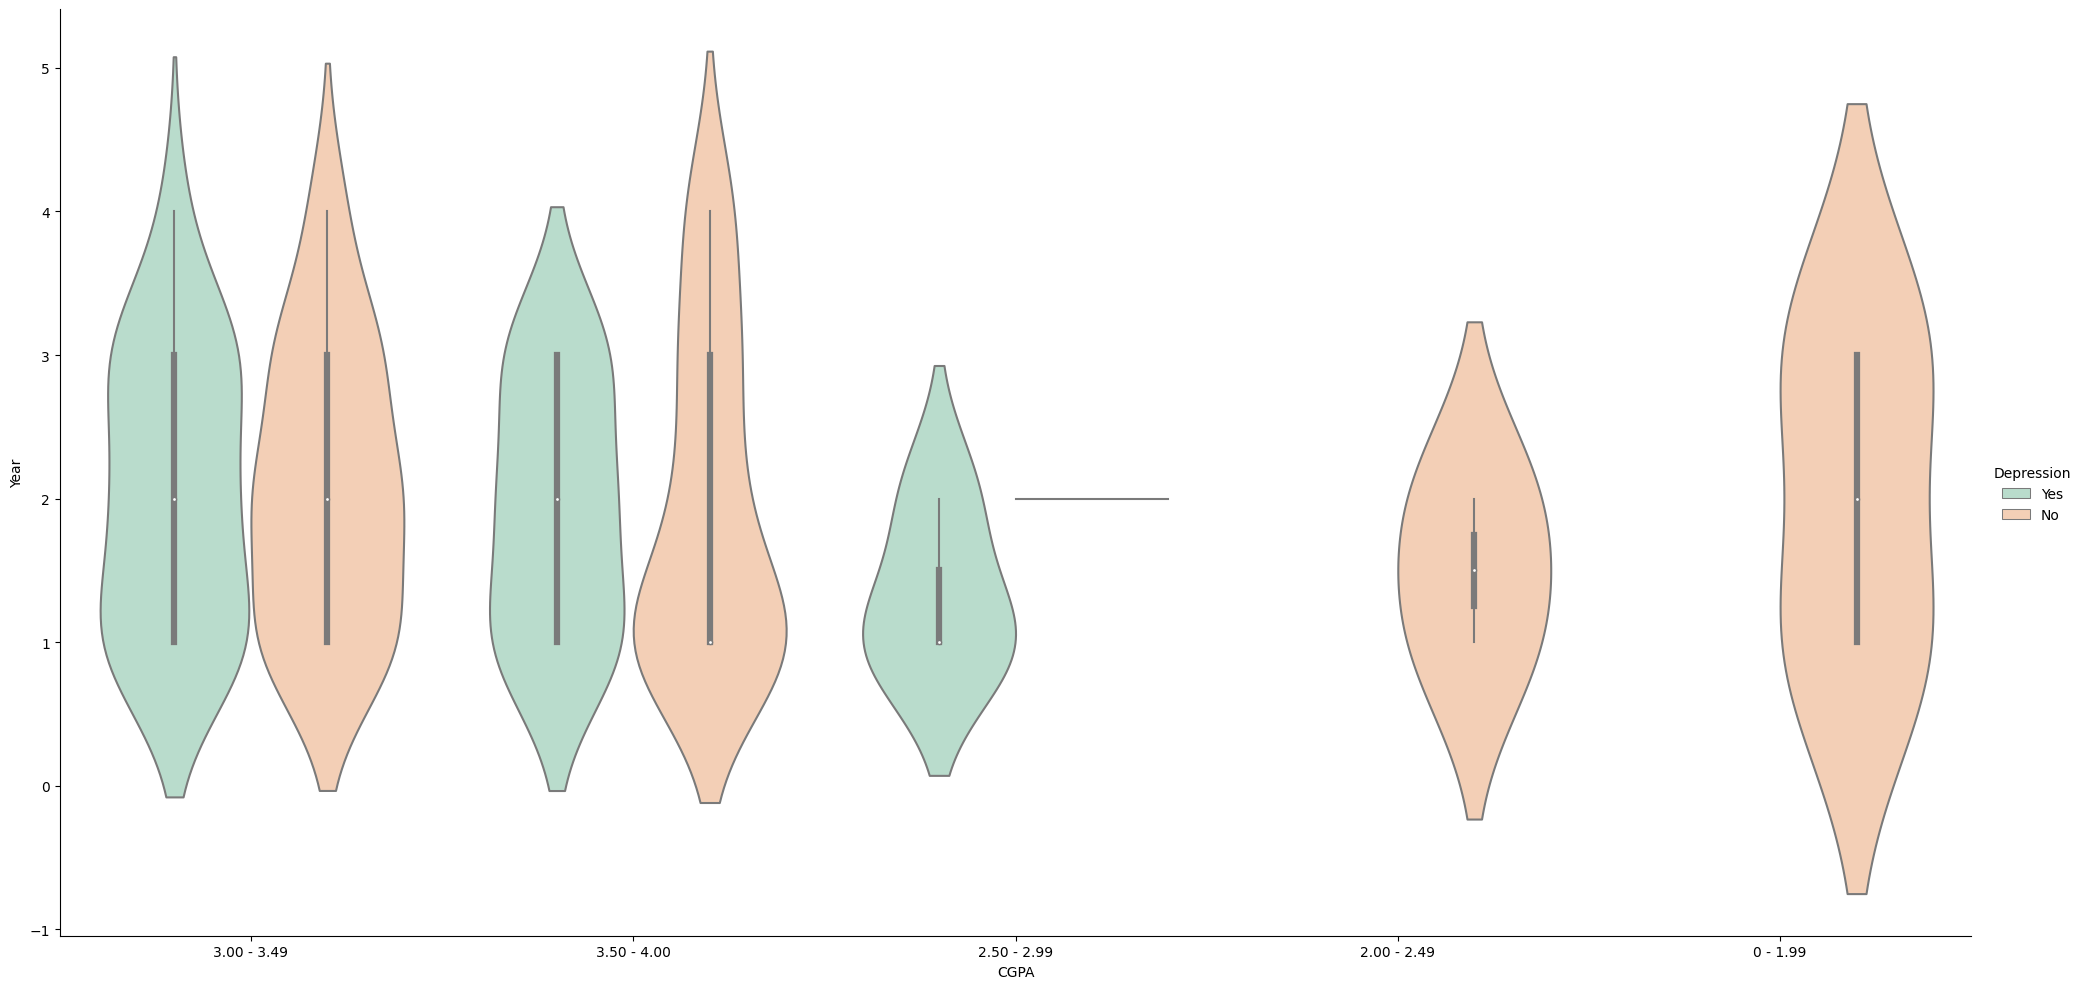

In [41]:
sns.catplot(data=df_mod00_health, x='CGPA', y='Year', hue='Depression', kind='violin', palette='Pastel2', height=10, aspect=2)

plt.show()

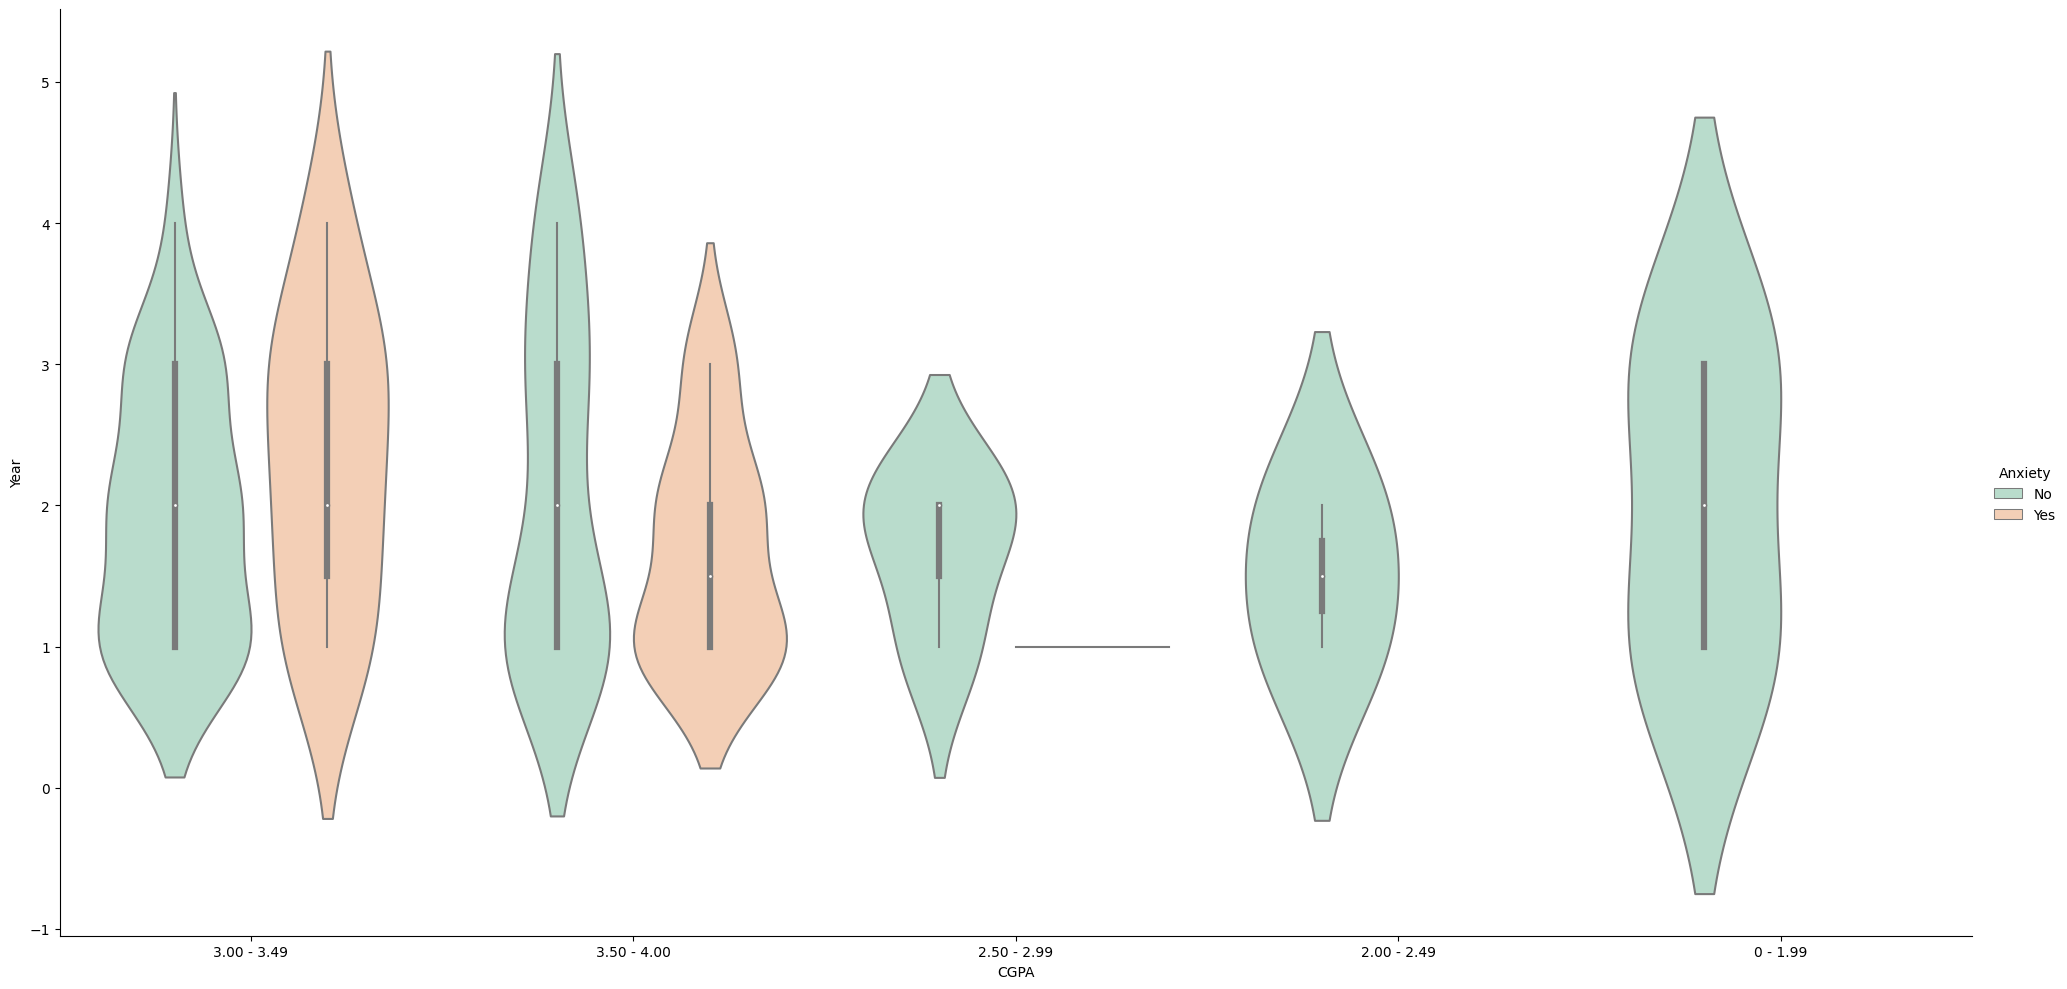

In [43]:
sns.catplot(data=df_mod00_health, x='CGPA', y='Year', hue='Anxiety', kind='violin', palette='Pastel2', height=10, aspect=2)

plt.show()

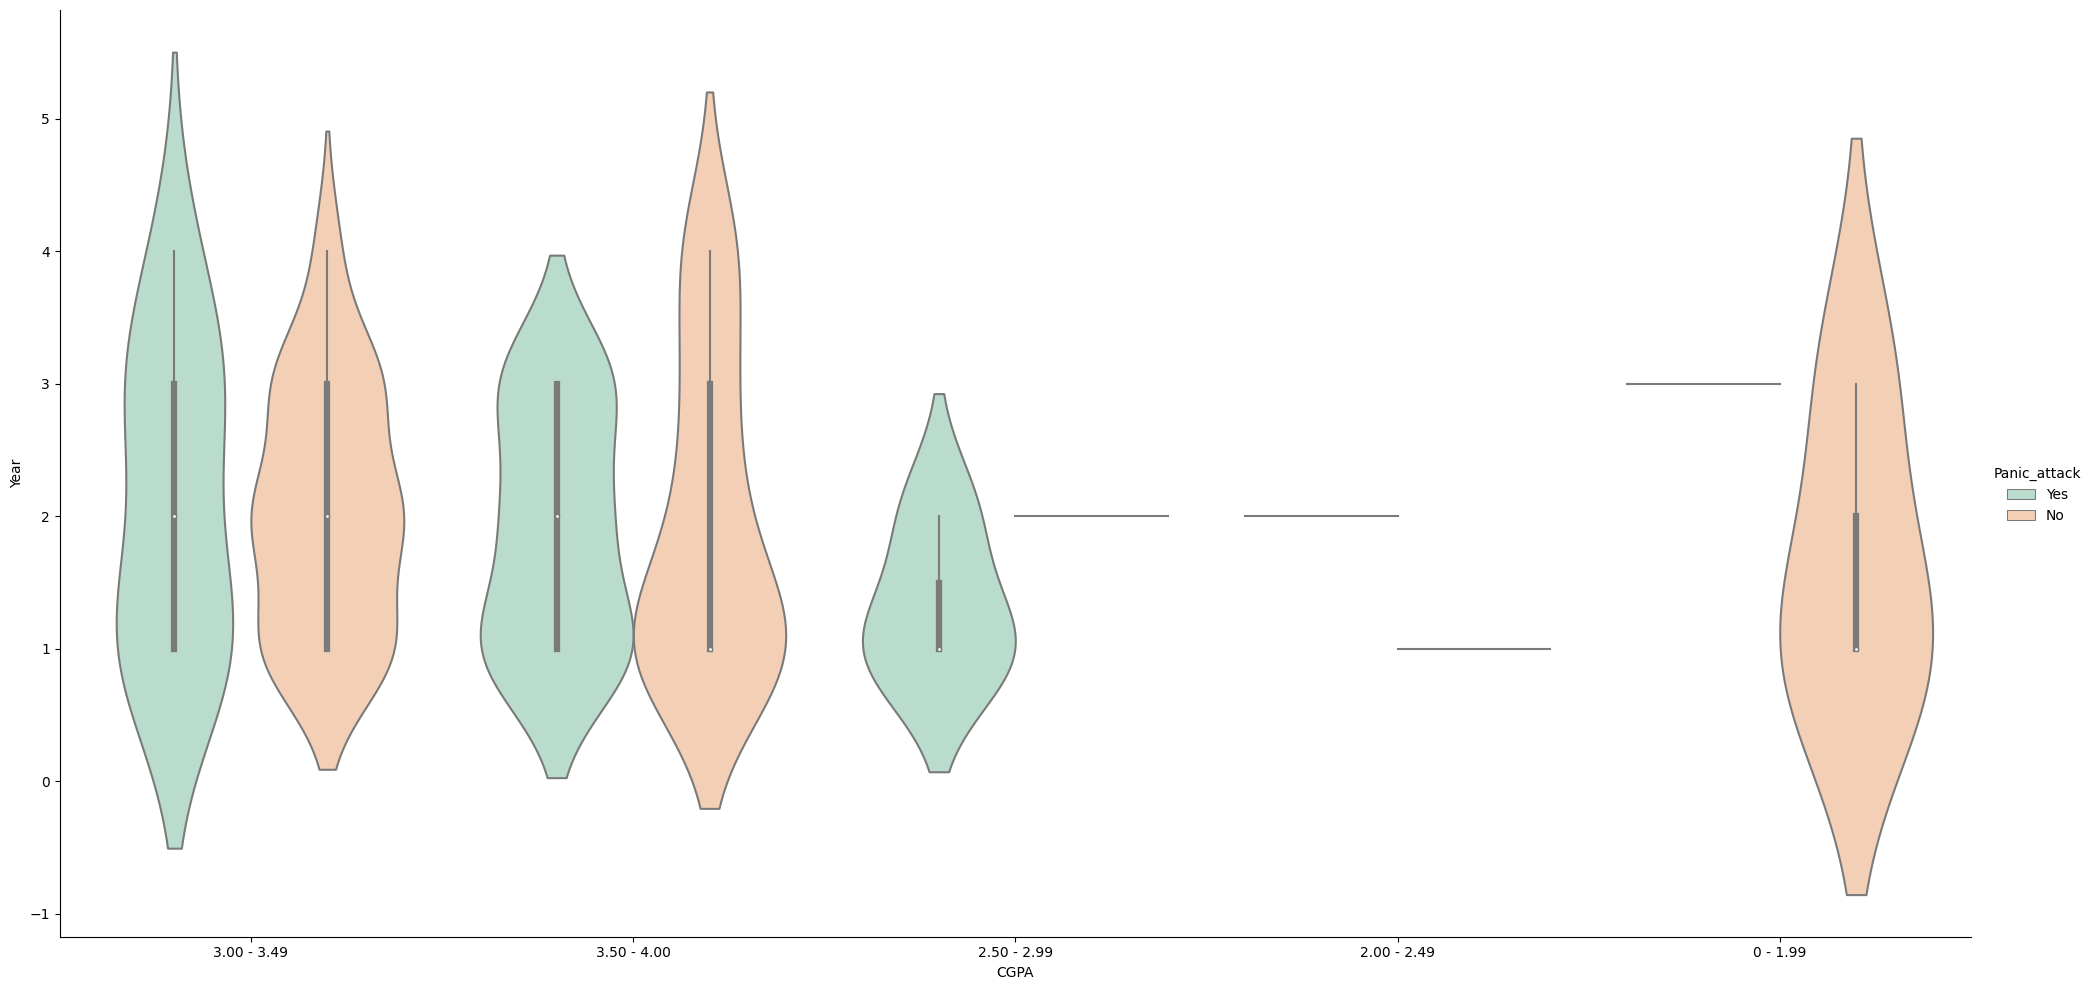

In [44]:
sns.catplot(data=df_mod00_health, x='CGPA', y='Year', hue='Panic_attack', kind='violin', palette='Pastel2', height=10, aspect=2)

plt.show()